In [1]:
import numpy as np
from cython_bbox import bbox_overlaps as bbox_ious

def ious(atlbrs, btlbrs):
    ious = np.zeros((len(atlbrs), len(btlbrs)), dtype=np.float64)
    if ious.size == 0:
        return ious

    ious = bbox_ious(
        np.ascontiguousarray(atlbrs, dtype=np.float64), 
        np.ascontiguousarray(btlbrs, dtype=np.float64)  
    )

    print("this is ious", ious)
    return ious

# Debug mode
def diou(atlbrs, btlbrs):
    """
    Compute DIOU between two sets of boxes
    :type atlbrs: list[tlbr] | np.ndarray
    :type btlbrs: list[tlbr] | np.ndarray
    :rtype: np.ndarray
    """
    atlbrs = np.asarray(atlbrs, dtype=np.float64)
    btlbrs = np.asarray(btlbrs, dtype=np.float64)
    
    _ious = bbox_ious(
        np.ascontiguousarray(atlbrs, dtype=np.float64),
        np.ascontiguousarray(btlbrs, dtype=np.float64)
    )
    
    dious = np.zeros((len(atlbrs), len(btlbrs)), dtype=np.float64)
    
    atlbrs_centers = (atlbrs[:, :2] + atlbrs[:, 2:]) / 2  

    print("acenter:", atlbrs_centers)
    
    btlbrs_centers = (btlbrs[:, :2] + btlbrs[:, 2:]) / 2  

    print("bcenter:", btlbrs_centers)

    for i in range(len(atlbrs)):
        for j in range(len(btlbrs)):
            center_dist = np.sqrt(np.sum((atlbrs_centers[i] - btlbrs_centers[j]) ** 2))
            print("center_dist:", center_dist)
            enclosing_mins = np.minimum(atlbrs[i, :2], btlbrs[j, :2])
            print("dig_min:", enclosing_mins)
            enclosing_maxs = np.maximum(atlbrs[i, 2:], btlbrs[j, 2:])
            print("dig_max", enclosing_maxs)
            
            enclosing_diag = np.sqrt(np.sum((enclosing_maxs - enclosing_mins) ** 2))

            print("dig_dis:", enclosing_diag)

            if enclosing_diag > 0: 
                dious[i, j] = _ious[i, j] - (center_dist ** 2) / (enclosing_diag ** 2)
            else:
                dious[i, j] = _ious[i, j]
    
    return dious 

In [2]:
import numpy as np

atlbrs = np.array([
    [0, 0, 39, 39]
], dtype=np.float64)

btlbrs = np.array([
    [0, 0, 19, 19]
], dtype=np.float64)

atlbrs = np.array([
    [0, 0, 4, 4]
], dtype=np.float64)

btlbrs = np.array([
    [0, 0, 2, 2]
], dtype=np.float64)

iou_values = ious(atlbrs, btlbrs)
diou_values = diou(atlbrs, btlbrs)



this is ious [[0.36]]
acenter: [[2. 2.]]
bcenter: [[1. 1.]]
center_dist: 1.4142135623730951
dig_min: [0. 0.]
dig_max [4. 4.]
dig_dis: 5.656854249492381


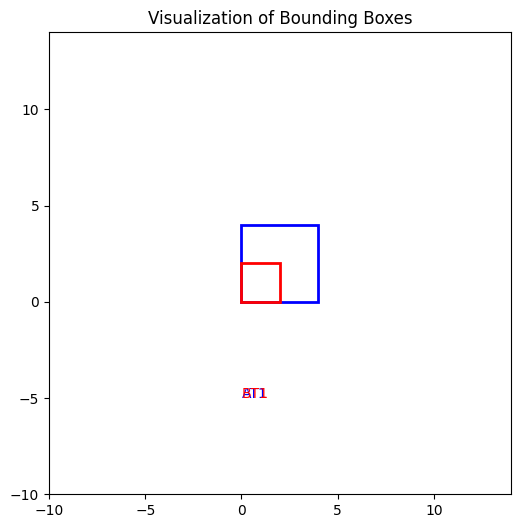

this is ious [[0.36]]
acenter: [[2. 2.]]
bcenter: [[1. 1.]]
center_dist: 1.4142135623730951
dig_min: [0. 0.]
dig_max [4. 4.]
dig_dis: 5.656854249492381


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(6, 6))

for i, box in enumerate(atlbrs, start=1):
    x_min, y_min, x_max, y_max = box
    width = x_max - x_min
    height = y_max - y_min
    
    rect = patches.Rectangle((x_min, y_min), width, height,
                             linewidth=2, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
    ax.text(x_min, y_min - 5, f"AT{i}", color='blue', fontsize=10)

for j, box in enumerate(btlbrs, start=1):
    x_min, y_min, x_max, y_max = box
    width = x_max - x_min
    height = y_max - y_min
    
    rect = patches.Rectangle((x_min, y_min), width, height,
                             linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(x_min, y_min - 5, f"BT{j}", color='red', fontsize=10)

# Adjust plot limits so everything is visible
all_x = np.concatenate([atlbrs[:, [0, 2]].flatten(), btlbrs[:, [0, 2]].flatten()])
all_y = np.concatenate([atlbrs[:, [1, 3]].flatten(), btlbrs[:, [1, 3]].flatten()])
ax.set_xlim(all_x.min() - 10, all_x.max() + 10)
ax.set_ylim(all_y.min() - 10, all_y.max() + 10)
ax.set_aspect('equal', adjustable='box')
ax.set_title("Visualization of Bounding Boxes")

plt.show()


iou_values = ious(atlbrs, btlbrs)
diou_values = diou(atlbrs, btlbrs)
